## 智慧預警 - 透過隨機森林找出危機公司

In [1]:
# 讀取 CSV File
import pandas as pd # 引用套件並縮寫為 pd
df = pd.read_csv('data/xgboost.csv')

In [2]:
df.head(10)

,公司,PRO/NNOR (5),PRO/NNOR (4),PRO/NNOR (3),PRO/NNOR (2),PRO/NNOR (1),PRO/NNOR (0),dangerous
0,1103 嘉泥,0.2182,0.1638,0.2493,0.2410,0.2360,0.2651,0
1,1109 信大,0.3982,0.3820,0.3651,0.3477,0.3261,0.2701,0
2,1109 信大,0.2701,0.2912,0.2734,0.2031,0.1357,0.2362,0
3,1109 信大,0.2912,0.2734,0.2031,0.1357,0.2362,0.2476,0
4,1109 信大,0.2734,0.2031,0.1357,0.2362,0.2476,0.2832,0
5,1109 信大,0.2031,0.1357,0.2362,0.2476,0.2832,0.2612,0
6,1113 永康,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1
7,1203 味王,0.2363,0.2199,0.2178,0.2091,0.2354,0.2603,1
8,1206 台鳳,0.1451,0.1288,0.1196,0.1133,0.1989,0.1291,1
9,1206 台鳳,0.1196,0.1133,0.1989,0.1291,0.1439,0.0268,1


In [3]:
X = df[['公司', 'PRO/NNOR (5)', 'PRO/NNOR (4)', 'PRO/NNOR (3)', 'PRO/NNOR (2)', 'PRO/NNOR (1)', 'PRO/NNOR (0)']] # feature
y = df['dangerous'] #label

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) #用來劃分訓練集和測試集
# 訓練集特徵值 , 測試集特徵值, 訓練集目標值 , 測試集目標值 = train_test_split(特徵值, 目標值, test_size=多少%為測試值 (0.多), random_state=隨機種子(隨便一個數))

In [6]:
X_train.head(10)

,公司,PRO/NNOR (5),PRO/NNOR (4),PRO/NNOR (3),PRO/NNOR (2),PRO/NNOR (1),PRO/NNOR (0)
334,2505 國揚,0.1274,0.0364,0.1472,-0.0085,-0.1815,0.2220
151,1613 台一,0.0288,0.0323,0.0261,0.0245,0.0055,0.0290
571,6172 互億,0.0852,0.0847,0.0093,-0.0852,0.0744,0.0347
263,2333 碧悠,0.1506,0.0002,-0.0372,-0.0304,-0.0516,-0.4286
458,2841 台開,-0.4153,0.0906,-0.2255,0.1750,-1.6358,0.4513
473,3004 豐達科,0.4673,0.3746,0.2790,0.2092,0.1924,0.2416
237,2033 佳大,0.1910,0.1219,0.1199,0.1121,0.2494,0.0789
524,3432 台端,0.1853,0.2432,0.5422,0.2759,0.3057,0.2888
145,1613 台一,0.0849,0.0716,-0.0036,-0.0522,-0.0188,0.0288
29,1232 大統益,0.1060,0.0774,0.0593,0.0783,0.0817,0.0845


In [7]:
X_train_NoName = X_train[['PRO/NNOR (5)', 'PRO/NNOR (4)', 'PRO/NNOR (3)', 'PRO/NNOR (2)', 'PRO/NNOR (1)', 'PRO/NNOR (0)']]
#將公司名稱從訓練集中去除

In [8]:
X_train_NoName.head(3)

,PRO/NNOR (5),PRO/NNOR (4),PRO/NNOR (3),PRO/NNOR (2),PRO/NNOR (1),PRO/NNOR (0)
334,0.1274,0.0364,0.1472,-0.0085,-0.1815,0.2220
151,0.0288,0.0323,0.0261,0.0245,0.0055,0.0290
571,0.0852,0.0847,0.0093,-0.0852,0.0744,0.0347


In [9]:
# 建立 random forest 模型
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth = 3, n_estimators = 10)
rfc.fit(X_train_NoName, y_train)

###################################
# n_estimators
# 森林中樹木的數量(base estimator的數量)

# 通常此值越大，模型效果往往越好
# 任何模型都有決策邊界，其值達到一定程度時，精確性往往不在上升或開始波動
# 其值越大，計算量與內存消耗量越大，訓練時間越長
# 渴望在訓練難度和模型效果之間取得平衡
####################################
# max_depth 限制樹的深度
####################################
# 使用訓練資料訓練模型
# randomForestModel.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [10]:
X_test_NoName = X_test[['PRO/NNOR (5)', 'PRO/NNOR (4)', 'PRO/NNOR (3)', 'PRO/NNOR (2)', 'PRO/NNOR (1)', 'PRO/NNOR (0)']]

In [11]:
X_test_NoName.head(3)

,PRO/NNOR (5),PRO/NNOR (4),PRO/NNOR (3),PRO/NNOR (2),PRO/NNOR (1),PRO/NNOR (0)
171,0.3380,0.3712,0.3795,0.4090,0.3066,0.2851
8,0.1451,0.1288,0.1196,0.1133,0.1989,0.1291
120,0.1701,0.1490,0.0941,0.0430,0.0904,0.0934


In [12]:
print('The accuracy of Random Forest Classifier on testing set:', rfc.score(X_test_NoName, y_test))
# score() 直接計算模型預測的準確率。
# 預測成功的比例
# print('訓練集: ',knnModel.score(X_train,y_train))
# print('測試集: ',knnModel.score(X_test,y_test))

The accuracy of Random Forest Classifier on testing set: 0.7134146341463414


In [13]:
testResults = rfc.predict(X_test_NoName) 
#進行預測

In [14]:
X_test['預測'] = testResults
X_test['真實'] = y_test

<ipython-input-14-b1396016042d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['預測'] = testResults
<ipython-input-14-b1396016042d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['真實'] = y_test


In [15]:
X_test['不同'] = X_test['預測'] - X_test['真實']

<ipython-input-15-c464ee3ff0c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['不同'] = X_test['預測'] - X_test['真實']


In [16]:
X_test.loc[X_test['不同'] != 0]

,公司,PRO/NNOR (5),PRO/NNOR (4),PRO/NNOR (3),PRO/NNOR (2),PRO/NNOR (1),PRO/NNOR (0),預測,真實,不同
8,1206 台鳳,0.1451,0.1288,0.1196,0.1133,0.1989,0.1291,0,1,-1
120,1604 聲寶,0.1701,0.1490,0.0941,0.0430,0.0904,0.0934,0,1,-1
114,1602 太電,-0.6422,0.0716,0.0786,0.0944,0.0979,0.0644,0,1,-1
264,2337 旺宏,0.3635,0.0993,0.0879,0.1291,0.1200,0.2419,0,1,-1
362,2521 宏總,0.1401,0.2678,0.1472,0.0188,0.0920,0.1691,0,1,-1
192,1905 華紙,0.0801,0.0259,0.1690,0.2447,0.0202,0.1713,1,0,1
569,6165 捷泰,0.1409,0.0726,0.0418,0.0724,0.2108,0.2295,0,1,-1
609,9110 越南控-DR,0.0000,0.0000,0.0000,0.0000,0.0000,0.1753,1,0,1
342,2506 太設,0.1511,0.2727,0.1968,0.1958,0.2562,0.2168,0,1,-1
589,6464 台數科,0.5476,0.5438,0.5760,0.5428,0.5062,0.4690,0,1,-1


In [17]:
X_test.loc[X_test['不同'] == 0]

,公司,PRO/NNOR (5),PRO/NNOR (4),PRO/NNOR (3),PRO/NNOR (2),PRO/NNOR (1),PRO/NNOR (0),預測,真實,不同
171,1802 台玻,0.3380,0.3712,0.3795,0.4090,0.3066,0.2851,0,0,0
199,1918 萬有,0.1065,-0.0023,-0.0146,0.0648,-0.0724,-0.0246,1,1,0
123,1606 歌林,0.1735,0.2561,0.1525,0.1265,-0.3051,-0.4043,1,1,0
138,1609 大亞,0.1075,0.1209,0.0936,0.1464,0.0921,0.1066,0,0,0
360,2520 冠德,0.2769,0.2350,0.1588,0.0601,0.1183,0.1486,0,0,0
...,...,...,...,...,...,...,...,...,...,...
549,5259 清惠,0.1706,0.0069,-0.1701,-0.1521,-0.3368,-0.2939,1,1,0
221,2024 志聯,0.0798,0.0425,0.0455,0.0344,-0.0359,0.0425,1,1,0
468,2910 統領,0.2433,0.2496,0.2557,0.2558,0.2425,0.2410,0,0,0
92,1464 得力,0.2949,0.2554,0.2253,0.2311,0.2439,0.2577,0,0,0


In [18]:
# Extract single tree
estimator_limited = rfc.estimators_[9]
# estimators_
# 使用estimator.estimators_查看森林中所有樹的狀況
# 其返回每棵樹對象構建的參數，為一列表
# 可以發現每棵樹只有random_state不同
# 可使用列表的方式取出某棵樹，再利用.屬性的方式查看該樹的屬性
# estimator.estimators_[0].random_state
# 查看estimator模型裡第0顆樹的random_state之值

from sklearn.tree import export_graphviz
export_graphviz(estimator_limited, out_file='tree_limited.dot', feature_names = X_train_NoName.columns,
                class_names = [str(i) for i in y_test.unique()],
                rounded = True, proportion = False, precision = 2, filled = True)
###################################
# feature_names：特徵名稱，順序必須和訓練樣本的數據一致
# class_names：類別名稱，輸入的時候，必須要排序。如將原來的['1', '0']設置為['0', '1']，注意：數據類型必須為str型的。
# filled：填充，必須為True
# node_ids：節點id，必須為True
# rounded：畫的圖形邊緣是否美化，必須為True
# special_characters：必須為True
###################################
# Pandas Series 的 unique() 方法在我們處理 DataFrame 的單列時使用，並返回一列的所有唯一元素。使用 unique() 函式的最終輸出是一個陣列
###################################
# 生成出的dot檔需透過外部的轉換進行 便可轉換成png => https://onlineconvertfree.com/convert/dot/
###################################

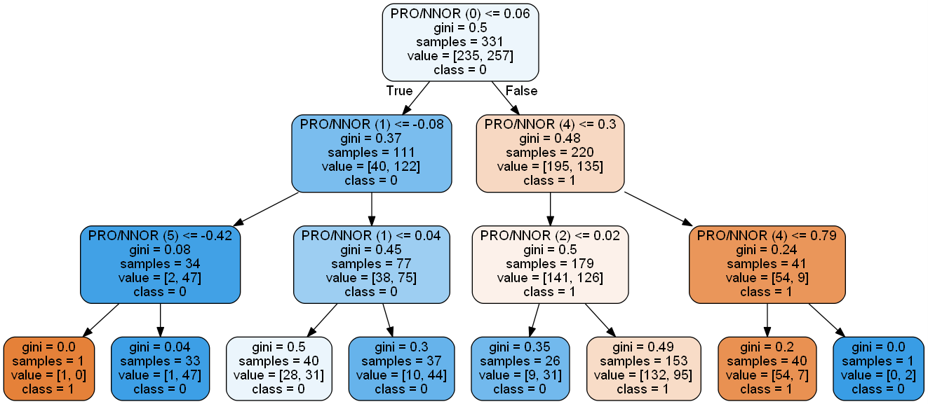

In [19]:
from IPython.display import Image
Image(filename = 'tree_limited.png') #顯示圖片